In [34]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib as mpl

In [85]:
df = pd.read_csv("Data/homeprices.csv")

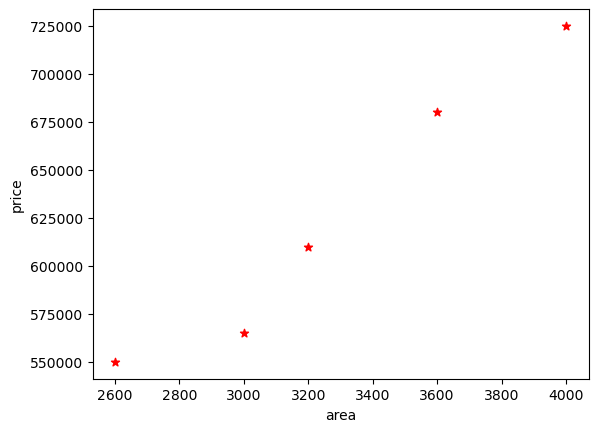

In [37]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='*')

In [88]:
area_df = df.drop('price',axis='columns')
area_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [89]:
price = df.price

In [90]:
reg = linear_model.LinearRegression()
reg.fit(area_df,price)

LinearRegression()

In [91]:
reg.predict([[3300]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [92]:
reg.coef_*3300+reg.intercept_

array([628715.75342466])

In [93]:
reg.coef_

array([135.78767123])

In [94]:
X =area_df.values
Y = price.values
type(Y)

numpy.ndarray

In [95]:
X*Y.reshape(-1,1)

array([[1430000000],
       [1695000000],
       [1952000000],
       [2448000000],
       [2900000000]], dtype=int64)

In [96]:
X =area_df.values
Y = price.values
XY = (X*Y.reshape(-1,1))
sum_Y = np.sum(Y)
sum_X = np.sum(X)
sum_XY =np.sum(XY)
sum_X_squared = np.sum(X**2)
n= len(X)
n,sum_Y,sum_X,sum_XY,sum_X_squared

(5, 3130000, 16400, 10425000000, 54960000)

In [97]:

a =np.array([[sum_X,n],[sum_X_squared,sum_X]])
b= np.array([sum_Y,sum_XY])
m = np.linalg.solve(a,b)[0]
c = np.linalg.solve(a,b)[1]
np.linalg.solve(a,b)

array([1.35787671e+02, 1.80616438e+05])

In [98]:

a =np.array([[16400,5],[54960000,5*16400]])
b= np.array([3130000,10425000000])
m = np.linalg.solve(a,b)[0]
c = np.linalg.solve(a,b)[1]
np.linalg.solve(a,b)

array([ 191.15420561, -985.79439252])

In [99]:
y_hat = np.dot(X,m)+c
y_hat

array([[496015.14018692],
       [572476.82242991],
       [610707.6635514 ],
       [687169.34579439],
       [763631.02803738]])

In [70]:
df.area.values

array([2600, 3000, 3200, 3600, 4000], dtype=int64)

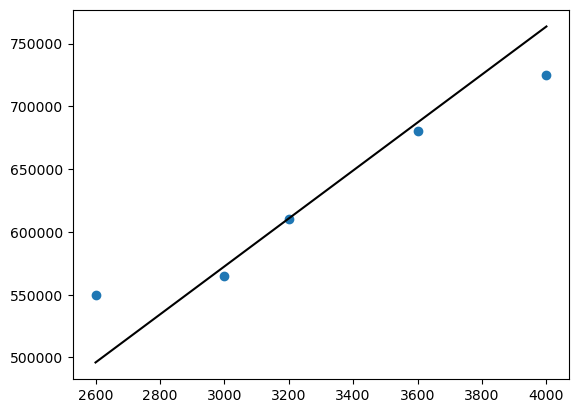

In [87]:
plt.scatter(X, df['price'])
plt.plot(X, y_hat, color="black")
#     ax.set_xlabel(feature)
#     ax.set_ylabel("sales")
#     ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))


In [13]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [73]:
df['prices']

KeyError: 'prices'

In [15]:
area_df.to_csv("Data/prediction.csv")

In [16]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


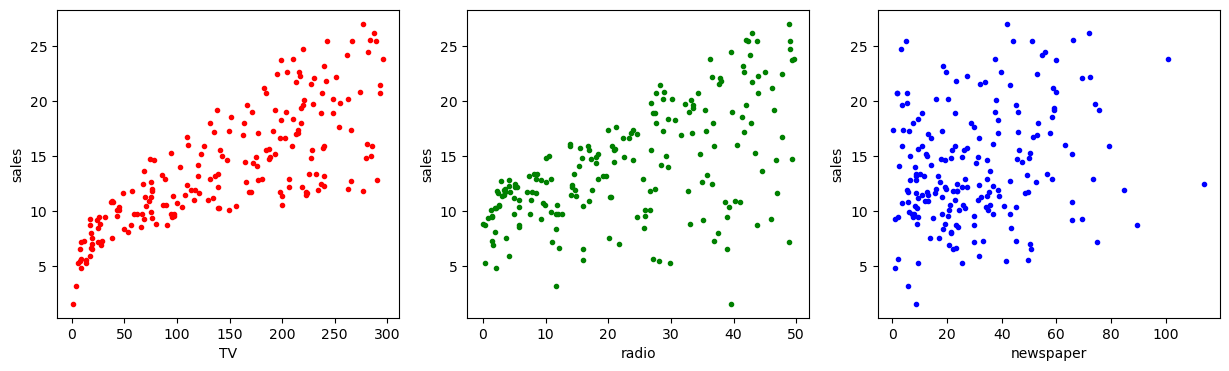

In [17]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# Plot of sales vs TV
ax = fig.add_subplot(gs[0])
ax.scatter(data_df["TV"], data_df["sales"], color="red", marker=".")
ax.set_xlabel("TV")
ax.set_ylabel("sales")

# Plot of sales vs radio
ax = fig.add_subplot(gs[1])
ax.scatter(data_df["radio"], data_df["sales"], color="green", marker=".")
ax.set_xlabel("radio")
ax.set_ylabel("sales")

# Plot of sales vs newspaper
ax = fig.add_subplot(gs[2])
ax.scatter(data_df["newspaper"], data_df["sales"], color="blue", marker=".")
ax.set_xlabel("newspaper")
ax.set_ylabel("sales")

plt.show()

0.047536640433019715
[[0.04753664]] [7.03259355] 7.0325935491277
0.20249578339243965
[[0.20249578]] [9.3116381] 9.311638095158282
0.0546930984722735
[[0.0546931]] [12.35140707] 12.351407069278155


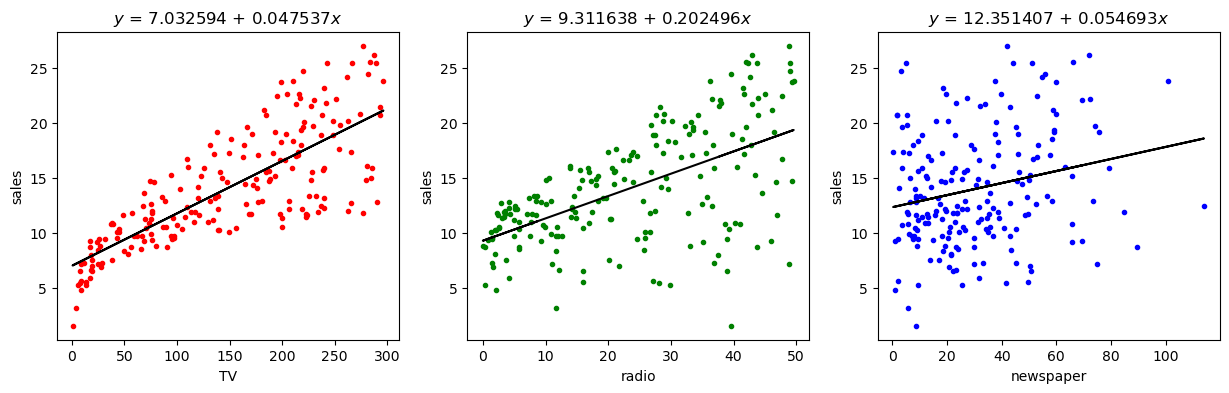

In [104]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# function for training model and plotting
def train_plot(data_df, feature, ax, col):
    X =data_df[[feature]].values
    Y = data_df[['sales']].values
    sum_Y = np.sum(Y)
    sum_X = np.sum(X)
    sum_XY =np.sum(X*Y)
    sum_X_squared = np.sum(X**2)
    n= len(X)
    
    a =np.array([[sum_X,n],[sum_X_squared,sum_X]])
    b= np.array([sum_Y,sum_XY])
    m = np.linalg.solve(a,b)[0]
    c = np.linalg.solve(a,b)[1]
    y_hat = np.dot(X,m)+c
    print(m)
    
    reg = linear_model.LinearRegression()
    reg.fit(X,Y)
    print(reg.coef_,reg.intercept_,c)
    ##Plot the regression line
    ax.scatter(data_df[feature], data_df["sales"], color=col, marker=".")
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title(("$y$ = %3f + %3f$x$" %(c, m)))


    
# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

plt.show()
    

In [ ]:

  sum_y =np.sum(Y)
    
  #total number of samples
  n = len(X)

    
  ##Plot the regression line
  ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
  ax.plot(X, y_hat, color="black")
  ax.set_xlabel(feature)
  ax.set_ylabel("sales")
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))

    
# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

plt.show()